This time I'm tackling house price data from Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

'With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.'

Let's begin by importing the training data, and then examining it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The meanings of those headings are contained in the 'data description' txt file, which I have open in another tab.

Now let's summarise the data and decide what to do next.

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
len(train.columns)

81

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.fillna(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


Below, I rank the correlations of the different variables with SalePrice, the variable we want to predict:

In [7]:
train[train.columns].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The features that correlate most strongly with SalePrice are OverallQual (Rates the overall material and finish of the house) and GrLivArea (Above grade (ground) living area square feet), GarageCars, GarageArea, and TotalBsmtSF.

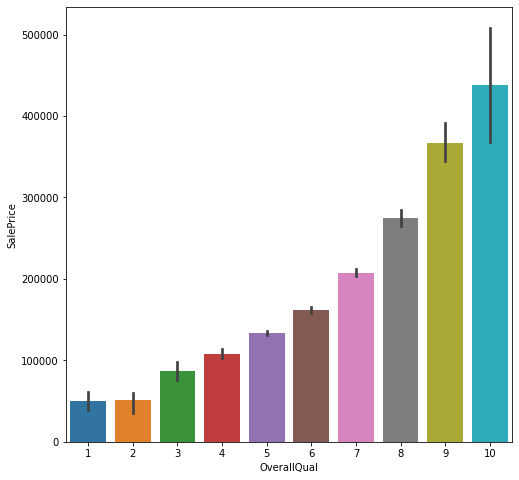

In [8]:
f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(data=train, x="OverallQual", y="SalePrice")
plt.show()

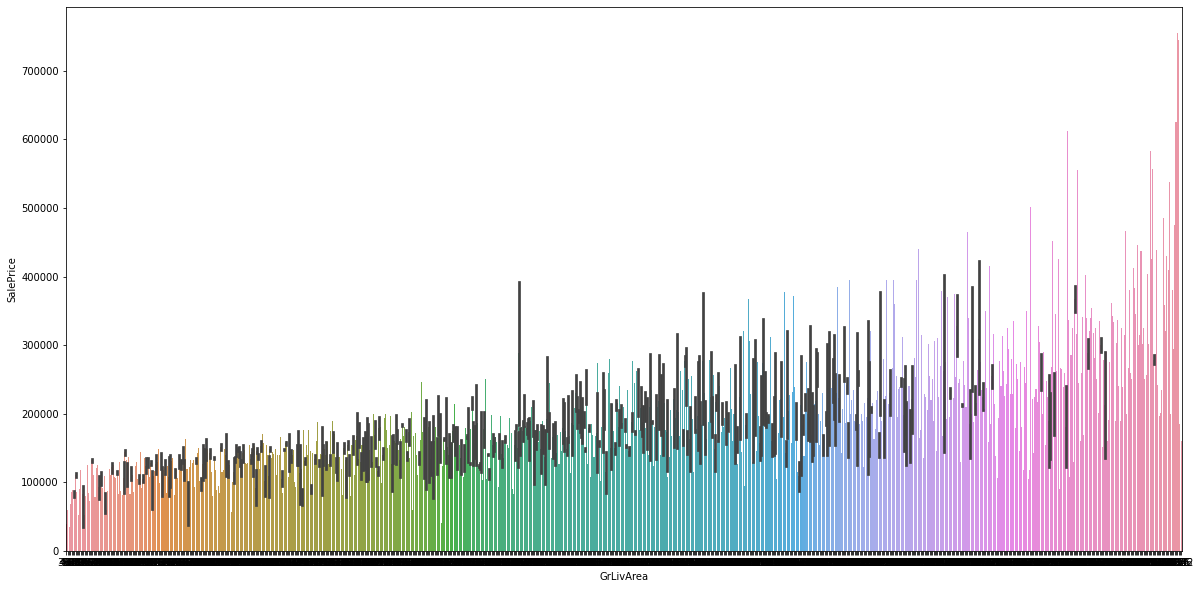

In [9]:
f, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=train, x="GrLivArea", y="SalePrice")
plt.show()

Let's also look at YearBuilt, which doesn't correlate especially strongly with sale price: 

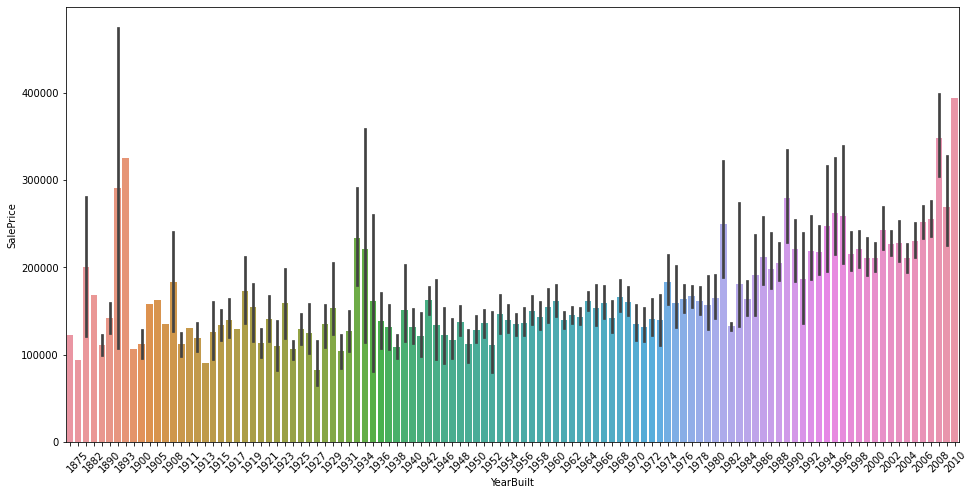

In [10]:
f, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=train, x="YearBuilt", y="SalePrice")
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xticks(rotation=45)
plt.show()

Having made some basic inspections of the data, I am going to clean it ahead of my analysis.

In [11]:
train.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

Let's do a simple regression based on those strongest correlated characteristics, because that seems the best way to start. I'm going to ignore the categorical data this time.

In [12]:
df = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','SalePrice']]


In [13]:
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,7,1710,2,548,856,208500
1,6,1262,2,460,1262,181500
2,7,1786,2,608,920,223500
3,7,1717,3,642,756,140000
4,8,2198,3,836,1145,250000


In [14]:
df.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.708624
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.640409
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.623431
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.613581
SalePrice,0.790982,0.708624,0.640409,0.623431,0.613581,1.000000


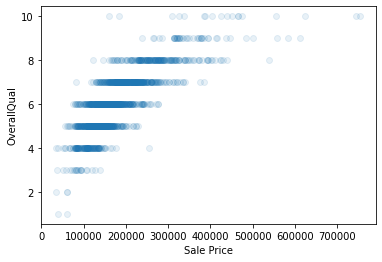

In [15]:
plt.scatter(df.SalePrice,df.OverallQual,alpha=0.1)
plt.xlabel('Sale Price')
plt.ylabel('OverallQual')
plt.show()

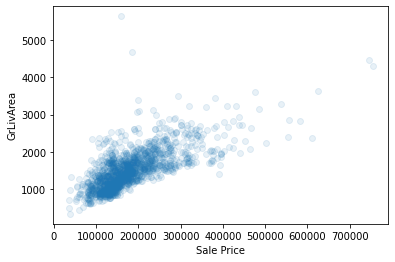

In [16]:
plt.scatter(df.SalePrice,df.GrLivArea,alpha=0.1)
plt.xlabel('Sale Price')
plt.ylabel('GrLivArea')
plt.show()

In [17]:
features = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
price = df['SalePrice']

In [18]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
features_s = s_scaler.fit_transform(features)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_s, price, test_size = 0.2, random_state = 1)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
model.score(X_train,y_train)

0.7451148450136538

In [23]:
model.score(X_test,y_test)

0.8093828665717504